Crypto API Project

In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0d0e73ef-219b-4aa2-81d6-0a998f31f8b4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-12-25T06:29:11.344Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 10462}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11853, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [5]:
import os

def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0d0e73ef-219b-4aa2-81d6-0a998f31f8b4',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df,df2])

    # Use this if you want to create a csv and append data to it

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df
    if not os.path.isfile(r"D:\Data Analytics\Python Projects\CryptoAPIProject\API.csv"):
        df.to_csv(r"D:\Data Analytics\Python Projects\CryptoAPIProject\API.csv", header="column_names")
    else:
        df.to_csv(r"D:\Data Analytics\Python Projects\CryptoAPIProject\API.csv", mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r"D:\Data Analytics\Python Projects\CryptoAPIProject\API.csv") 

In [6]:
from time import time, sleep

for i in range(3):
    api_runner()
    print('API Runner completed')
    sleep(20)

#use to exit the program after reaching the end of the loop
#exit()

{'status': {'timestamp': '2024-12-25T06:29:59.882Z', 'error_code': 0, 'error_message': None, 'elapsed': 13, 'credit_count': 1, 'notice': None, 'total_count': 10462}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11853, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [12]:
df72 = pd.read_csv(r"D:\Data Analytics\Python Projects\CryptoAPIProject\API.csv")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11853,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19800806.00000,19800806.00000,False,NaN,1,NaN,NaN,NaN,2024-12-25T06:27:00.000Z,97988.36971,44215667891.33467,-24.21440,-0.22870,4.06777,-5.72775,-0.36702,46.18348,53.94222,1940248698864.90430,56.47680,2057755763889.76001,NaN,2024-12-25T06:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-25 09:29:59.757536
1,1,1027,Ethereum,ETH,ethereum,9727,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120460544.64984,120460544.64984,True,NaN,2,NaN,NaN,NaN,2024-12-25T06:28:00.000Z,3481.99323,21874245834.25366,-28.11260,-0.15191,2.01569,-9.36363,2.82154,41.27421,33.20393,419442800549.37421,12.20920,419442800549.37000,NaN,2024-12-25T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-25 09:29:59.757536
2,2,825,Tether USDt,USDT,tether,110002,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,139423980093.45767,143440125284.69873,True,NaN,3,NaN,NaN,NaN,2024-12-25T06:27:00.000Z,0.99917,108788354014.25822,-16.25580,-0.02361,0.03773,-0.07462,-0.19825,0.04820,-0.05163,139308648466.54114,4.04750,143321471499.29001,NaN,2024-12-25T06:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-25 09:29:59.757536
3,3,52,XRP,XRP,xrp,1487,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57252380420.00000,99986807248.00000,False,NaN,4,NaN,NaN,NaN,2024-12-25T06:28:00.000Z,2.29979,5732165491.93556,-27.44410,0.03588,2.31703,-8.75311,56.97788,348.74556,293.65653,131668505511.02348,3.82660,229979093524.34000,NaN,2024-12-25T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-25 09:29:59.757536
4,4,1839,BNB,BNB,bnb,2316,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144007481.77000,144007481.77000,False,NaN,5,NaN,NaN,NaN,2024-12-25T06:27:00.000Z,704.45609,1073058416.68055,-33.35400,0.16626,1.83992,-0.99724,6.73665,21.22940,18.85023,101446947297.12604,2.95050,101446947297.13000,NaN,2024-12-25T06:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-25 09:29:59.757536
5,5,5426,Solana,SOL,solana,814,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,479440107.17799,590784325.70636,True,NaN,6,NaN,NaN,NaN,2024-12-25T06:27:00.000Z,199.65828,3575950828.91334,-14.31560,0.26051,4.45130,-7.74003,-21.27036,19.45480,32.40143,95724185093.36996,2.78200,117954979772.23000,NaN,2024-12-25T06:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-25 09:29:59.757536
6,6,74,Dogecoin,DOGE,dogecoin,1132,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147343346383.70520,147343346383.70520,True,NaN,7,NaN,NaN,NaN,2024-12-25T06:27:00.000Z,0.33411,3139982716.81116,-13.57350,-0.08791,3.67324,-13.29156,-21.50331,149.10890,202.05879,49229233272.60025,1.43030,49229233272.60000,NaN,2024-12-25T06:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-25 09:29:59.757536
7,7,3408,USDC,USDC,usd-coin,24129,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43232743528.35101,43232743528.35101,False,NaN,8,NaN,NaN,NaN,2024-12-25T06:27:00.000Z,0.99998,6893823491.74734,-20.65110,-0.01425,-0.02170,0.00228,-0.00807,0.01048,0.01302,43231936230.97874,1.25610,43231936230.98000,NaN,2024-12-25T06:27:00.000Z,1027.00000,Ethereum,ETH,ethereum

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.30632,3.95116,-5.83461,-0.47788,46.03982,53.84394
Ethereum,-0.06950,2.03920,-9.30622,2.90101,41.34409,33.23108
Tether USDt,-0.02408,0.05484,-0.08563,-0.19690,0.04396,-0.05550
XRP,0.03154,2.30749,-8.78075,56.95105,348.72021,293.64102
BNB,0.11206,1.68748,-1.07257,6.61009,21.07527,18.68003
Solana,0.08516,4.15437,-7.94218,-21.46881,19.13713,31.94299
Dogecoin,-0.15414,3.39920,-13.41511,-21.66667,148.48204,201.07121
USDC,-0.00517,0.00733,0.01249,0.00806,0.02525,0.01225
Cardano,-0.02746,2.27551,-9.91835,-11.47345,178.93142,137.62538


In [15]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.30632
             quote.USD.percent_change_24h     3.95116
             quote.USD.percent_change_7d     -5.83461
             quote.USD.percent_change_30d    -0.47788
             quote.USD.percent_change_60d    46.03982
             quote.USD.percent_change_90d    53.84394
Ethereum     quote.USD.percent_change_1h     -0.06950
             quote.USD.percent_change_24h     2.03920
             quote.USD.percent_change_7d     -9.30622
             quote.USD.percent_change_30d     2.90101
             quote.USD.percent_change_60d    41.34409
             quote.USD.percent_change_90d    33.23108
Tether USDt  quote.USD.percent_change_1h     -0.02408
             quote.USD.percent_change_24h     0.05484
             quote.USD.percent_change_7d     -0.08563
             quote.USD.percent_change_30d    -0.19690
             quote.USD.percent_change_60d     0.04396
             quote.USD.percent_change_90

In [16]:
type(df4)

pandas.core.series.Series

In [18]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.30632
            quote.USD.percent_change_24h   3.95116
            quote.USD.percent_change_7d   -5.83461
            quote.USD.percent_change_30d  -0.47788
            quote.USD.percent_change_60d  46.03982
            quote.USD.percent_change_90d  53.84394
Ethereum    quote.USD.percent_change_1h   -0.06950
            quote.USD.percent_change_24h   2.03920
            quote.USD.percent_change_7d   -9.30622
            quote.USD.percent_change_30d   2.90101
            quote.USD.percent_change_60d  41.34409
            quote.USD.percent_change_90d  33.23108
Tether USDt quote.USD.percent_change_1h   -0.02408
            quote.USD.percent_change_24h   0.05484
            quote.USD.percent_change_7d   -0.08563
            quote.USD.percent_change_30d  -0.19690
            quote.USD.percent_change_60d   0.04396
            quote.USD.percent_change_90d  -0.05550
XRP         quote.USD.percent_change_1h    0.03154
            quote.USD.percent_change_24h   2.30749
            quote.USD.percent_change_7d   -8.78075
            quote.USD.percent_change_30d  56.95105
            quote.USD.percent_change_60d 348.72021
            quote.USD.percent_change_90d 293.64102
BNB         quote.USD.percent_change_1h    0.11206
            quote.USD.percent_change_24h   1.68748
            quote.USD.percent_change_7d   -1.07257
            quote.USD.percent_change_30d   6.61009
            quote.USD.percent_change_60d  21.07527
            quote.USD.percent_change_90d  18.68003
Solana      quote.USD.percent_change_1h    0.08516
            quote.USD.percent_change_24h   4.15437
            quote.USD.percent_change_7d   -7.94218
            quote.USD.percent_change_30d -21.46881
            quote.USD.percent_change_60d  19.13713
            quote.USD.percent_change_90d  31.94299
Dogecoin    quote.USD.percent_change_1h   -0.15414
            quote.USD.percent_change_24h   3.39920
            quote.USD.percent_change_7d  -13.41511
            quote.USD.percent_change_30d -21.66667
            quote.USD.percent_change_60d 148.48204
            quote.USD.percent_change_90d 201.07121
USDC        quote.USD.percent_change_1h   -0.00517
            quote.USD.percent_change_24h   0.00733
            quote.USD.percent_change_7d    0.01249
            quote.USD.percent_change_30d   0.00806
            quote.USD.percent_change_60d   0.02525
            quote.USD.percent_change_90d   0.01225
Cardano     quote.USD.percent_change_1h   -0.02746
            quote.USD.percent_change_24h   2.27551
            quote.USD.percent_change_7d   -9.91835
            quote.USD.percent_change_30d -11.47345
            quote.USD.percent_change_60d 178.93142
            quote.USD.percent_change_90d 137.62538
TRON        quote.USD.percent_change_1h    0.39027
            quote.USD.percent_change_24h   2.18165
            quote.USD.percent_change_7d   -5.83711
            quote.USD.percent_change_30d  22.93479
            quote.USD.percent_change_60d  56.85188
            quote.USD.percent_change_90d  70.10083
Avalanche   quote.USD.percent_change_1h   -0.30118
            quote.USD.percent_change_24h   6.04391
            quote.USD.percent_change_7d  -11.95463
            quote.USD.percent_change_30d  -3.33647
            quote.USD.percent_change_60d  61.78700
            quote.USD.percent_change_90d  47.67404
Chainlink   quote.USD.percent_change_1h    0.05331
            quote.USD.percent_change_24h   3.58597
            quote.USD.percent_change_7d   -8.73551
            quote.USD.percent_change_30d  37.47318
            quote.USD.percent_change_60d 121.03366
            quote.USD.percent_change_90d 105.10249
Toncoin     quote.USD.percent_change_1h   -0.19974
            quote.USD.percent_change_24h   3.85869
            quote.USD.percent_change_7d    0.91755
            quote.USD.percent_change_30d  -4.76615
            quote.USD.percent_change_60d  18.01306
            quo

In [19]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.30632
1,Bitcoin,quote.USD.percent_change_24h,3.95116
2,Bitcoin,quote.USD.percent_change_7d,-5.83461
3,Bitcoin,quote.USD.percent_change_30d,-0.47788
4,Bitcoin,quote.USD.percent_change_60d,46.03982
5,Bitcoin,quote.USD.percent_change_90d,53.84394
6,Ethereum,quote.USD.percent_change_1h,-0.06950
7,Ethereum,quote.USD.percent_change_24h,2.03920
8,Ethereum,quote.USD.percent_change_7d,-9.30622
9,Ethereum,quote.USD.percent_change_30d,2.90101


In [20]:
df6 = df6.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.30632
1,Bitcoin,quote.USD.percent_change_24h,3.95116
2,Bitcoin,quote.USD.percent_change_7d,-5.83461
3,Bitcoin,quote.USD.percent_change_30d,-0.47788
4,Bitcoin,quote.USD.percent_change_60d,46.03982
5,Bitcoin,quote.USD.percent_change_90d,53.84394
6,Ethereum,quote.USD.percent_change_1h,-0.06950
7,Ethereum,quote.USD.percent_change_24h,2.03920
8,Ethereum,quote.USD.percent_change_7d,-9.30622
9,Ethereum,quote.USD.percent_change_30d,2.90101


In [24]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,-0.30632
1,Bitcoin,24h,3.95116
2,Bitcoin,7d,-5.83461
3,Bitcoin,30d,-0.47788
4,Bitcoin,60d,46.03982
5,Bitcoin,90d,53.84394
6,Ethereum,1h,-0.06950
7,Ethereum,24h,2.03920
8,Ethereum,7d,-9.30622
9,Ethereum,30d,2.90101


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

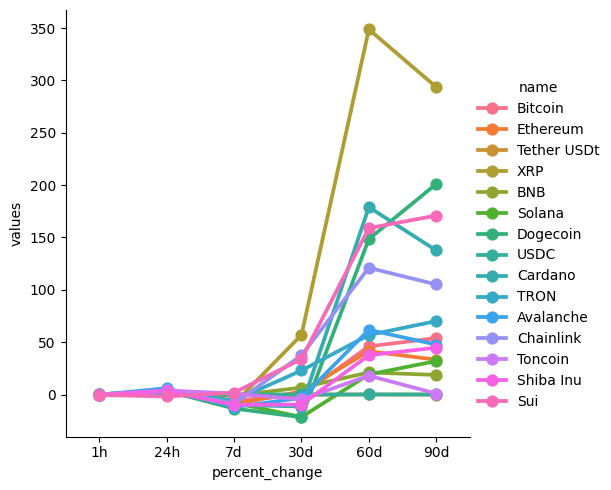

In [25]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [28]:
df10 = df72[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,97988.36971,2024-12-25 09:29:59.757536
15,Bitcoin,97894.44840,2024-12-25 09:30:20.355648
30,Bitcoin,97894.44840,2024-12-25 09:30:40.573585


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

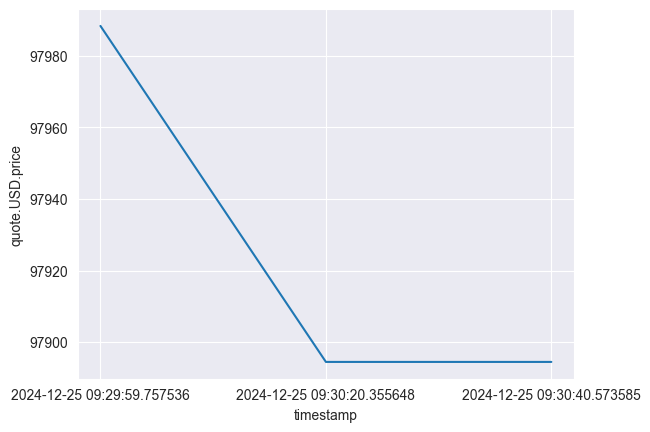

In [30]:
sns.set_style(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)